# Tiago testcases 

## Simulation of typical section aeroelastic response (based on setup at ITA LNCA)

In [2]:
#workspace()
include("../src/UNSflow.jl")
using UNSflow


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

### Structural and aerodynamic parameters

In [3]:
c = 0.29; #m, Chord
mass = 6.5 # + 7.0; %kg, Mass from base and typical seccion
airdensity = 1.119 #kg/m^3   ### Structural definitions
pvt = 0.43105  #Elastic Axis, Percentage from LE Pivot(0-1)

w_h = 2.38*2*pi  # rad/s Natural Frequency for H
w_alpha = 4.29*2*pi  #rad/s Natural Frequency for Alpha

x_alpha = 0.0275/(c/2) #Distance between ea and cg divided by c %Static Unbalance
r_alpha = 0.064/(c/2) # 2*sqrt(Itheta/(m*c^2)) %Radius of Gyration (Admensional)
kappa = pi*airdensity*c^2/(4*mass/0.75) 

w_alphadot = 0.
w_hdot = 1.
cubic_h_1 = 1.
cubic_h_3 = 0.
cubic_alpha_1 = 1.
cubic_alpha_3 = 0.

0.0

### Initial condition

In [4]:
alpha_init = 10*pi/180
alphadot_init = 0.
h_init = 0.
hdot_init = 0.
udot = 0


0

### Simulation control

In [5]:
dt = 0.015
lespcrit = [0.3;] # High value, No LEV shedding
del = DelVortDef(1, 500, 10)



UNSflow.DelVortDef(1,500,10.0)

### Case 1

In [6]:
u = 16

kinem = KinemPar2DOF(alpha_init, h_init, alphadot_init, hdot_init, u, udot, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)

strpar = TwoDOFPar(x_alpha, r_alpha, kappa, w_alpha, w_h, w_alphadot, w_hdot, cubic_h_1, cubic_h_3, cubic_alpha_1, cubic_alpha_3)

surf = TwoDSurf_2DOF(c, u, "FlatPlate", pvt, 70, 35, strpar, kinem, lespcrit)

curfield = TwoDFlowField()

nsteps = 100

@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del)


  likely near In[6]:7
  likely near In[6]:7
  likely near In[6]:7
  likely near In[6]:7
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kiran/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kiran/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kiran/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in ldvm(::UNSflow.TwoDSurf_2DOF, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef, ::Float64, ::Array{Float64,2}, ::Float64) at /Users/kiran/Documents/Projects/UNSflow/src/solvers.jl:472
 in ldvm(::UNSflow.TwoDSurf_2D

  4.593322 seconds (3.58 M allocations: 155.877 MB, 1.50% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 0.0269156 0.147698 … 0.00891671 0.131368; 0.0271875 0.147169 … 0.00851581 0.131371],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.14716907105652455,0.0009477304694982354,-1.9610645899796781,0

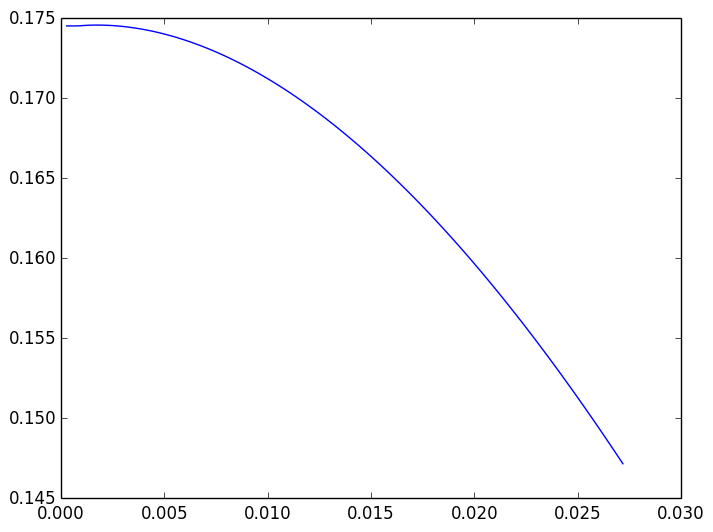

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318ad53d0>

In [7]:
plot(mat[:,1],mat[:,2])

In [8]:
t = mat[end,1]  

nsteps = 100
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



  0.661780 seconds (111.12 k allocations: 18.417 MB, 1.80% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 0.0541031 0.0785557 … -0.0134204 0.102284; 0.054375 0.0777424 … -0.0134518 0.101758],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.0777423902404204,0.002586814407208996,-2.997229543338356,0.0

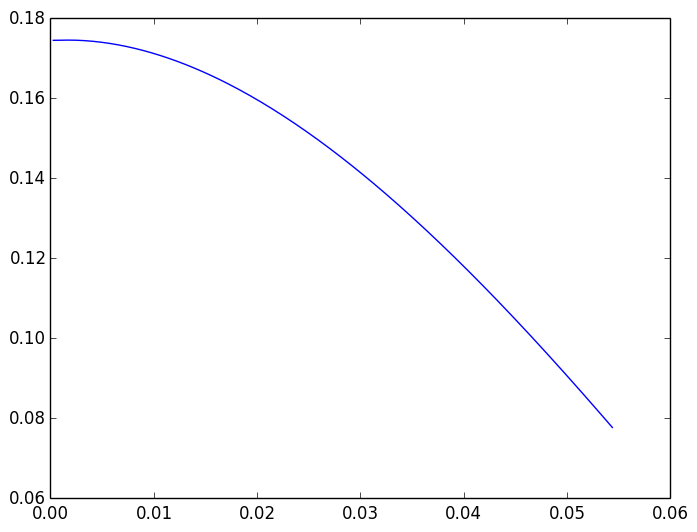

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318d3a3d0>

In [9]:
plot(mat[:,1],mat[:,2])

In [10]:
t = mat[end,1]  

nsteps = 1000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



 13.333685 seconds (1.04 M allocations: 257.873 MB, 0.23% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 0.325978 0.202284 … 0.0625838 0.152555; 0.32625 0.202495 … 0.0624373 0.152939],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.20249546571701457,-0.008392874518867284,0.7604329656016898,0.26660

In [11]:
t = mat[end,1]  

nsteps = 3000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)




132.638618 seconds (4.20 M allocations: 1.684 GB, 0.14% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 1.1416 0.514266 … 0.930998 0.132736; 1.14188 0.519229 … 0.939432 0.136586],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.5192290314133465,0.023261888987521667,18.153376095231664,0.87635375968

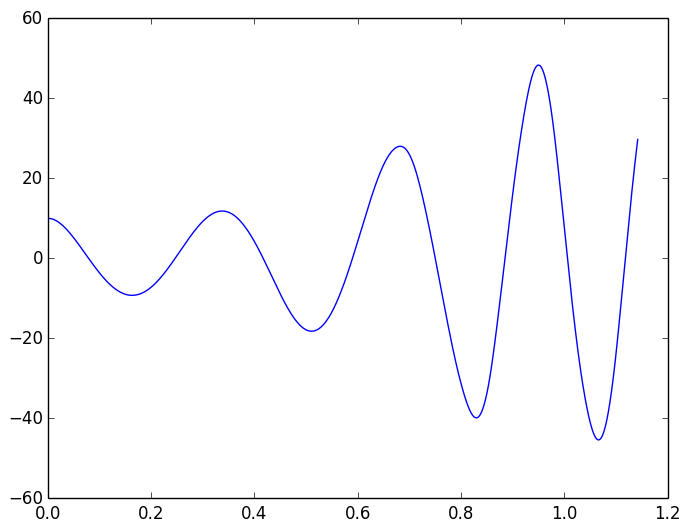

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1091c4dd0>

In [12]:
plot(mat[:,1],mat[:,2]*180/pi)

In [ ]:
t = mat[end,1]  

nsteps = 3000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



